# CSE1015 - Machine Learning Essentials
# Pinni Venkata Abhiram
# 20BAI1132

### Implementation of KNN Classifier and Naive Bayes Algorithm

#### KNN Classifier

#### Importing all the necessary modules

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tsplit
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB as naive_bayes_algo

#### Ignoring the warnings

In [77]:
warnings.filterwarnings('ignore')

#### Loading the dataset

In [78]:
df = pd.read_csv('Iris.csv')

### Preprocessing the data for train set

In [79]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [80]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [81]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count
print("Rows :",count_row,"\nColumns :",count_col)

Rows : 150 
Columns : 6


In [82]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Checking for null columns in our dataset

In [84]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [85]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There are no columns with NaN values all are filled

### Visualising the data

<AxesSubplot:>

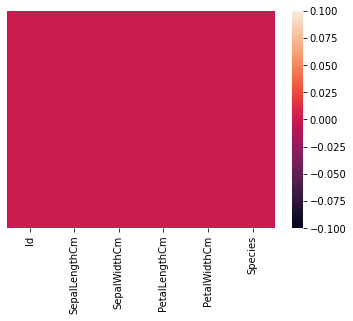

In [86]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True)


<AxesSubplot:xlabel='Species', ylabel='count'>

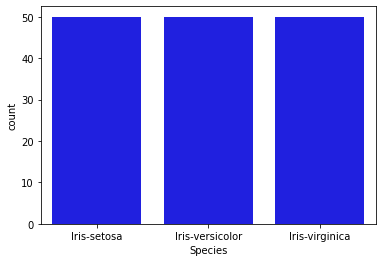

In [87]:
sns.countplot(x='Species',data=df,color='blue')

#### There are equal number of Iris - setosa , Iris - versicolor and Iris - virginica flowers

<AxesSubplot:>

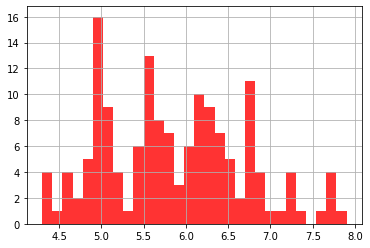

In [88]:
df['SepalLengthCm'].hist(bins=30,color='red',alpha=0.8)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

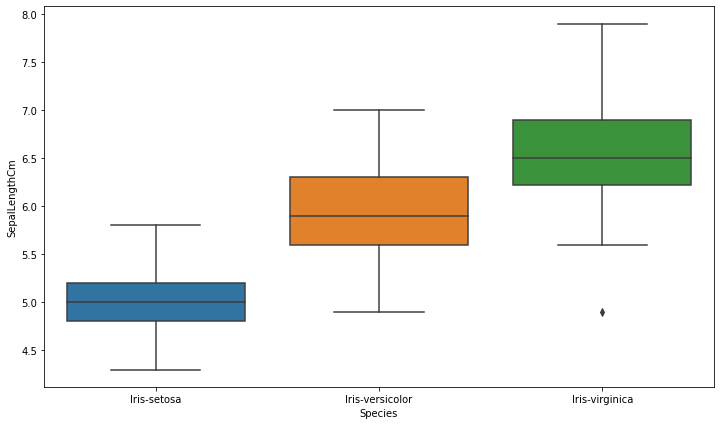

In [89]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)

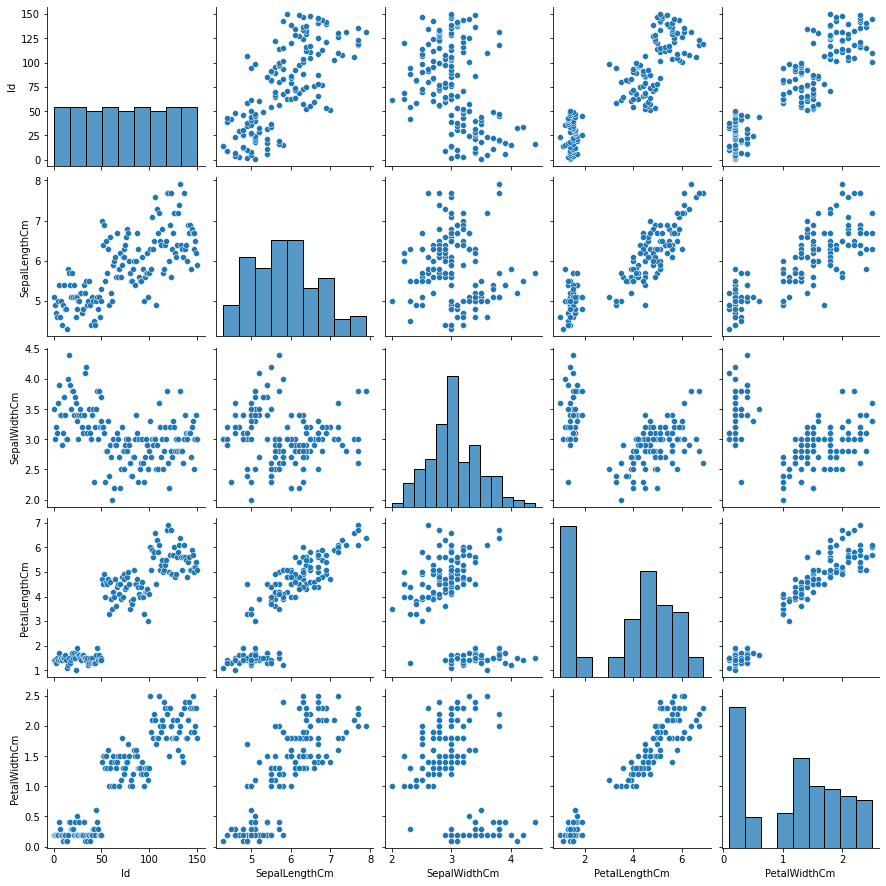

In [90]:
sns.pairplot(df)

#### Cleaning of Data

In [91]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### No extra cleaning is required because the data has no NaN values

#### Splitting the data into features (Deciding factors) and labels (the final classification answer)

In [92]:
X = df.drop(['Species','Id'],axis = 1)
Y = df['Species']

In [93]:
X.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [94]:
Y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

#### As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [95]:
le = LabelEncoder()
y = le.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Splitting into training set and test set 

In [96]:
x_train , x_test, y_train , y_test = tsplit(X,y,train_size=0.75,random_state=1)

#### Visualisation of data after removing ID and Species

<Figure size 432x288 with 0 Axes>

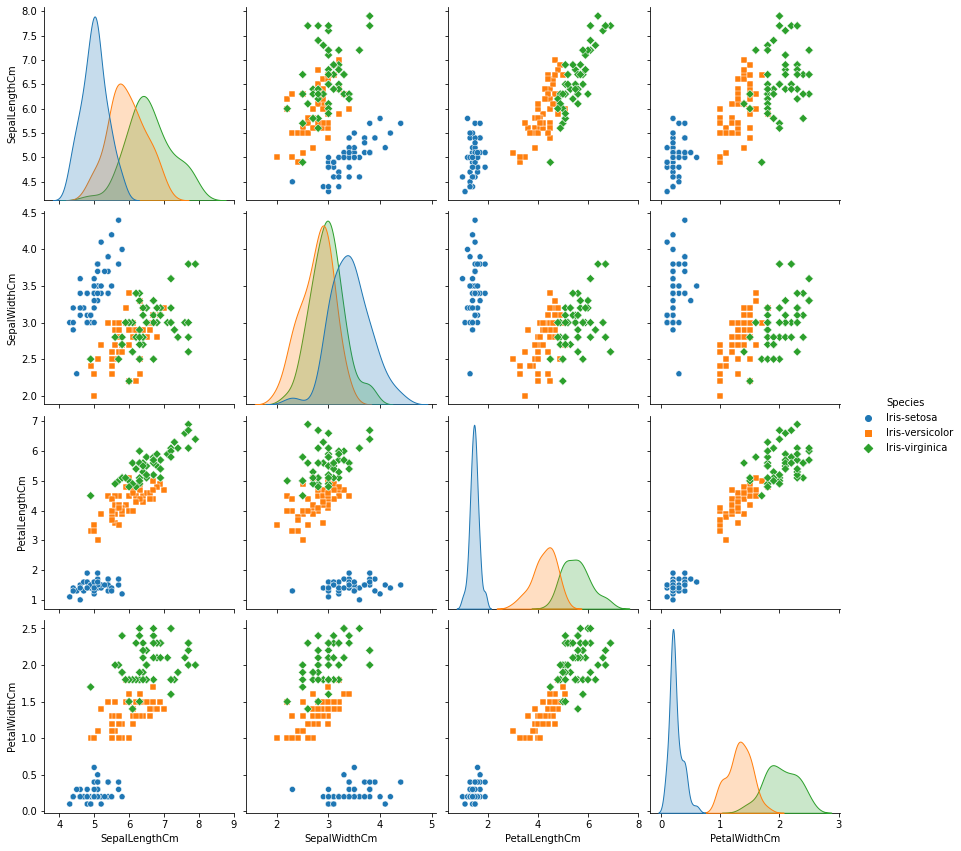

In [97]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

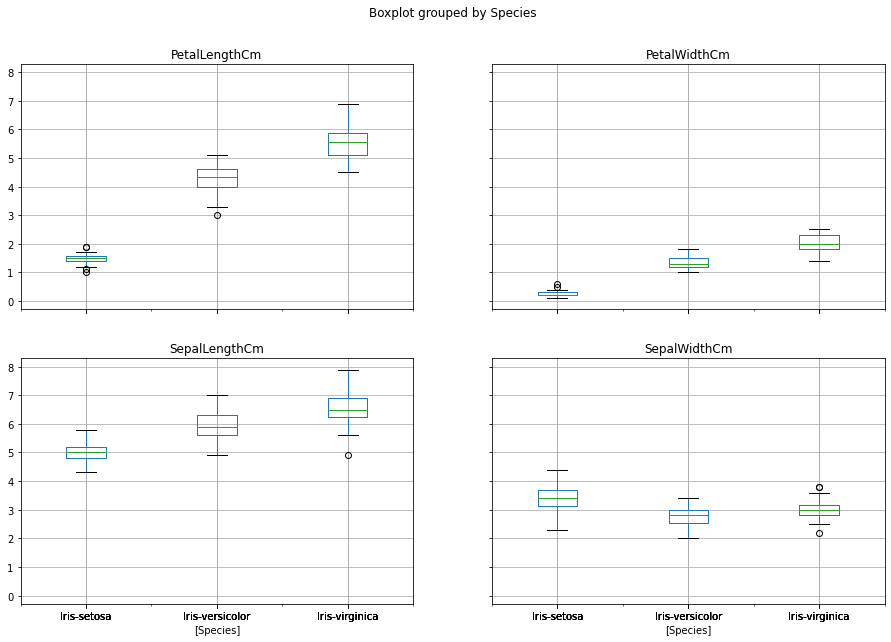

In [98]:
df.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))

#### Performing Knn Classification method using sklearn module

##### Learning Module for knn

In [99]:
classifier = knn(n_neighbors=3)

##### Training of the module using training dataset

In [100]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Predictions 

In [101]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

#### Building the Confusion Matrix and calculating the accuracy of the model

In [102]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

In [103]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


### Therefore the Knn Classifier model is implemented successfully and the accuracy of the model is 100% 

## Implementation of Naive Bayes Algorithm using the same dataset

#### Naive bayes classification model

In [106]:
naive_bayes = naive_bayes_algo()

#### Fitting the model with our training datasets 

In [108]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

#### Predictions

In [110]:
y_pred = naive_bayes.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [112]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 38 points : 1


#### Confusion Matrix and Accuracy scores

In [113]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [114]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.37 %.


#### The Naive Bayes model gives us a accuracy of 97.37% and Knn Model gives a accuracy of 100% 

### Therefore both models are implemented successfully